# 1.7 20th_Century | Network Grap Visualizations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship_4.csv', index_col = 0)

In [4]:
# Check relationship_df data

relationship_df

,source,target,value
0,france,russia,12
1,germany,russia,26
2,austria,germany,17
3,austria,hungary,6
4,bulgaria,hungary,6
...,...,...,...
74,greece,italy,2
75,italy,japan,6
76,romania,russia,6
77,india,lebanon,2


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", # how often the interaction between teh characters occurs. 
                            create_using = nx.Graph())

# Q.4 Create a static network graph using only NetworkX.

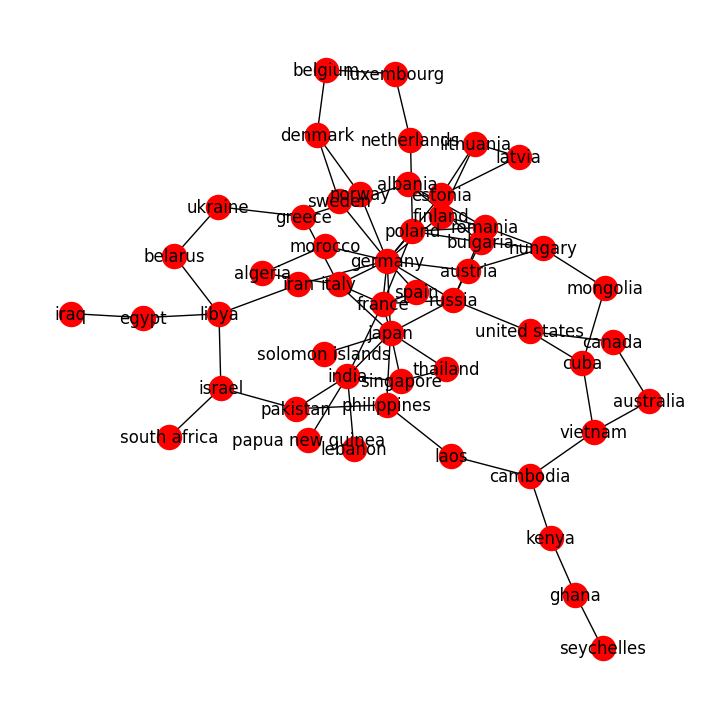

In [7]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

NOTE: The graph seems to suggest that certain countries (possibly in Europe) have a higher level of interconnectedness, while others (especially isolated nodes) have fewer direct connections within this network.

In [9]:
h.savefig('networkx_plt_20th_century.png')

# Q.5 . Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [10]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size') #  This degree is also used to set the size of the nodes in the graph using the set_node_attributes()
net.from_nx(G) #  create the graph based on the G network
net.show_buttons(filter_ = True) # method is invoked to display a set of filter buttons and options for the graph
net.repulsion() # method tackles the physics options of the graph
net.show("20th_century.html") # Save chart

20th_century.html


NOTE: the graph suggests that Germany and some of its European neighbors occupy central positions within this network, potentially indicating high connectivity or influence. Meanwhile, countries positioned at the periphery are less connected or have a more limited role in this network.

# Q.6 Apply the Leiden algorithm to detect any communities within the countries.

In [11]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [12]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [13]:
# convert the coms object into something more readable

new_com = coms.to_node_community_map()

In [14]:
# check the output

new_com

defaultdict(list,
            {'france': [0],
             'germany': [0],
             'italy': [0],
             'spain': [0],
             'poland': [0],
             'netherlands': [0],
             'luxembourg': [0],
             'belgium': [0],
             'denmark': [0],
             'norway': [0],
             'sweden': [0],
             'morocco': [0],
             'algeria': [0],
             'japan': [1],
             'thailand': [1],
             'singapore': [1],
             'philippines': [1],
             'solomon islands': [1],
             'india': [1],
             'pakistan': [1],
             'israel': [1],
             'south africa': [1],
             'papua new guinea': [1],
             'lebanon': [1],
             'laos': [2],
             'cambodia': [2],
             'kenya': [2],
             'ghana': [2],
             'seychelles': [2],
             'mongolia': [2],
             'cuba': [2],
             'united states': [2],
             'canada': [2],
 

In [15]:
# To use this output in the pyvis chart, you’ll need to add it to a dictionary called “dict_com”:

dict_com = {k:v[0] for k, v in new_com.items()}

# Once the result has been stored in the dictionary, go ahead and remake the dynamic network graph to comb through the communities and add them to the graph:

In [16]:
# Check the output

dict_com

{'france': 0,
 'germany': 0,
 'italy': 0,
 'spain': 0,
 'poland': 0,
 'netherlands': 0,
 'luxembourg': 0,
 'belgium': 0,
 'denmark': 0,
 'norway': 0,
 'sweden': 0,
 'morocco': 0,
 'algeria': 0,
 'japan': 1,
 'thailand': 1,
 'singapore': 1,
 'philippines': 1,
 'solomon islands': 1,
 'india': 1,
 'pakistan': 1,
 'israel': 1,
 'south africa': 1,
 'papua new guinea': 1,
 'lebanon': 1,
 'laos': 2,
 'cambodia': 2,
 'kenya': 2,
 'ghana': 2,
 'seychelles': 2,
 'mongolia': 2,
 'cuba': 2,
 'united states': 2,
 'canada': 2,
 'australia': 2,
 'vietnam': 2,
 'greece': 3,
 'ukraine': 3,
 'belarus': 3,
 'libya': 3,
 'egypt': 3,
 'iraq': 3,
 'iran': 3,
 'russia': 4,
 'austria': 4,
 'hungary': 4,
 'bulgaria': 4,
 'albania': 4,
 'romania': 4,
 'estonia': 5,
 'latvia': 5,
 'lithuania': 5,
 'finland': 5}

In [18]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G,dict_com,'group')
com_net = Network (notebook = True, width="1300px",height="700px",bgcolor='#222222',font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show("20th_century_leiden.html")

20th_century_leiden.html


NOTES: 
The community partition observed in the network visualization appears to align with historical events and alliances from the 20th century:

- European Alliances and Blocs:
Many central European countries, including Germany, France, and Italy, are clustered together. This aligns with historical alliances such as the European Union (EU) formation post-World War II and earlier coalitions during the two World Wars.

- Allied and Axis Powers:
Countries such as Germany, Italy, and Japan might form a community, representing the Axis powers. Meanwhile, the United States, the United Kingdom, and the Soviet Union (Russia) could form another community representing Allied powers. 

- Cold War Blocs:
The partition also potentially aligns with the Cold War era, where countries were divided into Western (NATO) and Eastern (Warsaw Pact) blocs. This would group the United States and Western European countries separately from the Soviet Union and its allies, highlighting the political and ideological divide that dominated the latter half of the 20th century.

- Colonial Ties and Former Empires:
Some communities may represent former colonial ties, grouping countries based on historical colonial powers. For example, countries like Canada, Australia, and India might cluster with the United Kingdom, reflecting British colonial influence. Similarly, African countries may cluster with former colonial powers in Europe, reflecting their historical connections.


CLuster descriptions: 

* The color clusters might represent different types of alliances, regional proximity, trade partnerships, or other forms of association among countries.
* Central countries are likely to have more influence or stronger connectivity within this network, while isolated or peripheral nodes might represent countries with limited connections in this specific context.


Overall, this chart effectively visualizes the interconnectedness of countries within different communities, with a clear structure that highlights central hubs, regional clusters, and isolated members.

# Q.8 Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise

## Centrality Measures

In [19]:
# Degree Centrality

degree_dict = nx.degree_centrality(G)
# To discover the degree centrality of the network, we used the NetworkX function degree_centrality(). 
# It returns a dictionary with the output of the calculation. 

#Checking the output
degree_dict

{'france': 0.13725490196078433,
 'russia': 0.11764705882352941,
 'germany': 0.2549019607843137,
 'austria': 0.0392156862745098,
 'hungary': 0.0784313725490196,
 'bulgaria': 0.0784313725490196,
 'italy': 0.09803921568627451,
 'spain': 0.0392156862745098,
 'poland': 0.09803921568627451,
 'estonia': 0.058823529411764705,
 'latvia': 0.0392156862745098,
 'lithuania': 0.058823529411764705,
 'finland': 0.058823529411764705,
 'netherlands': 0.0392156862745098,
 'luxembourg': 0.0392156862745098,
 'belgium': 0.0392156862745098,
 'denmark': 0.058823529411764705,
 'norway': 0.0392156862745098,
 'sweden': 0.0392156862745098,
 'albania': 0.058823529411764705,
 'greece': 0.058823529411764705,
 'ukraine': 0.0392156862745098,
 'belarus': 0.0392156862745098,
 'libya': 0.0784313725490196,
 'egypt': 0.0392156862745098,
 'iraq': 0.0196078431372549,
 'japan': 0.1764705882352941,
 'morocco': 0.0392156862745098,
 'algeria': 0.0392156862745098,
 'thailand': 0.0392156862745098,
 'singapore': 0.05882352941176470

In [20]:
# Let's convert the degree_dict to a pandas dataframe and sort the centrality values so you can plot a bar chart with the characters’ degree centrality:

degree_df = pd.DataFrame(degree_dict.items(),columns=['countries','centrality'])

In [21]:
# Sorting graph value from centrality column in ascending mode

degree_df.sort_values(by=['centrality'],ascending=False, inplace = True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

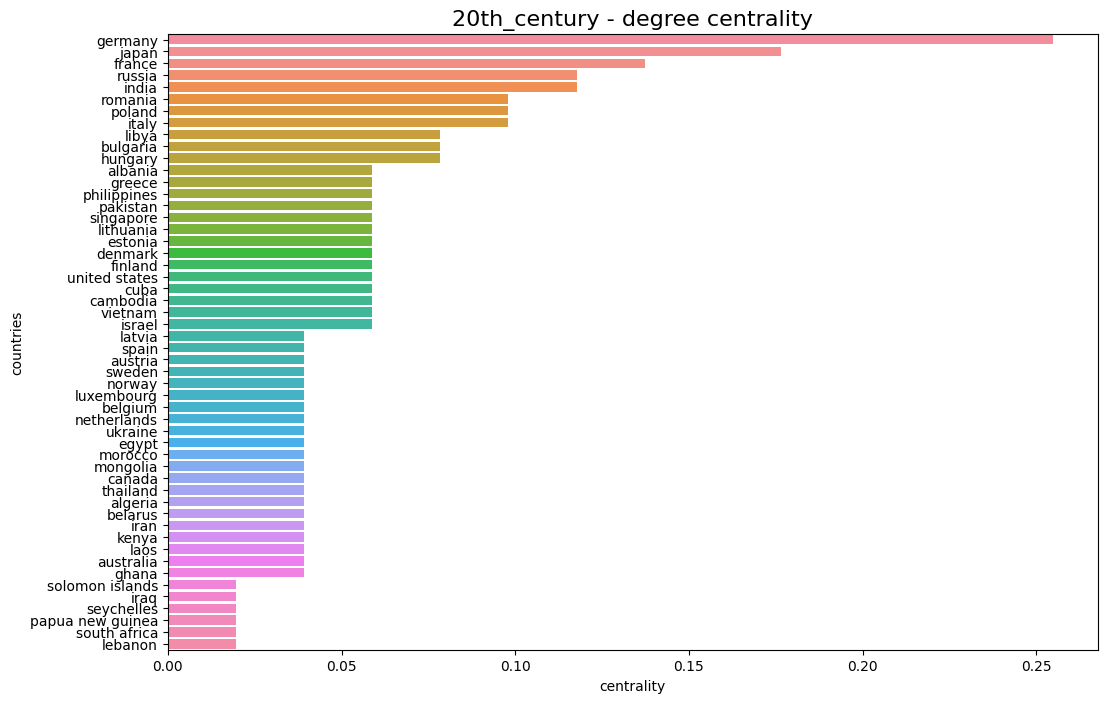

In [27]:
# Creating a plot with teh degree of centrality

plt.figure(figsize = (12,8))
with sns.dark_palette ("xkcd:blue",22):
    sns.barplot(x = "centrality", y = "countries",
                saturation = 0.9,data = degree_df).set_title("20th_century - degree centrality",fontsize=16)
    plt.set_xlabel("Centrality", fontsize=14)
    plt.set_ylabel("Countries", fontsize=14)
    
    # Increase the font size of the tick labels
    plt.tick_params(labelsize=12)

    # Optional: Rotate the y-axis labels if still cluttered
    plt.yticks(rotation=0)
    
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

NOTE: 

**Top Countries by Degree Centrality:**
Germany has the highest degree centrality, suggesting it was highly interconnected or involved in numerous relationships with other countries. This aligns with historical context, as Germany played a central role in both World Wars and was a key player in European political and economic alliances.
Japan, France, Russia, and India also show high degree centrality, reflecting their significant roles in 20th-century geopolitics. Japan and Germany were Axis powers in WWII, while France and Russia were prominent Allied powers. India’s high degree centrality might reflect its post-colonial diplomatic and economic relationships.


**Middle-Ranked Countries**:
Countries like Poland, Italy, Bulgaria, Greece, and Hungary have moderate degree centrality scores. These countries were frequently involved in 20th-century alliances, conflicts, or political shifts, especially within Europe. Their centrality indicates they were moderately interconnected, likely due to their geopolitical significance in European and global affairs.


**Low Centrality Countries**:
Countries like Solomon Islands, Laos, Ghana, Iraq, and Seychelles have low degree centrality. These countries were relatively less connected within this network, indicating they might have had limited involvement in major global alliances or events. This could be due to factors such as geographical isolation, smaller economies, or policies of neutrality or nonalignment during the Cold War.



**Interpretation of Degree Centrality**:
Degree centrality highlights which countries had the most connections, but it doesn’t necessarily mean they were the most influential. However, a high degree centrality does suggest that a country was central to many relationships, which could indicate strategic importance, geopolitical influence, or active involvement in global or regional affairs.
For example, Germany and Japan’s high degree centrality reflects their major roles in both World Wars and subsequent economic growth. Similarly, France, Russia, and the United States are also high on this list, correlating with their active diplomatic and military roles in various alliances.


**Regional Insights**:
European countries tend to dominate the upper portion of the chart, reflecting the continent's extensive network of alliances, particularly in the context of the European Union, NATO, and historical alliances during the World Wars.
Asian countries like Japan, India, and the Philippines also appear with moderate to high centrality, possibly reflecting post-war alliances, economic ties, and regional coalitions.


In [26]:
# Save the plot as a file
plt.savefig("countries_centrality.png", dpi=300, bbox_inches='tight')  # Change file format if needed
plt.show()

<Figure size 640x480 with 0 Axes>

# Closeness Centrality

In [28]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(),columns = ['countries','centrality'])

In [29]:
# Sort the closeness degree

closeness_df.sort_values(by = ['centrality'],ascending=False, inplace = True)

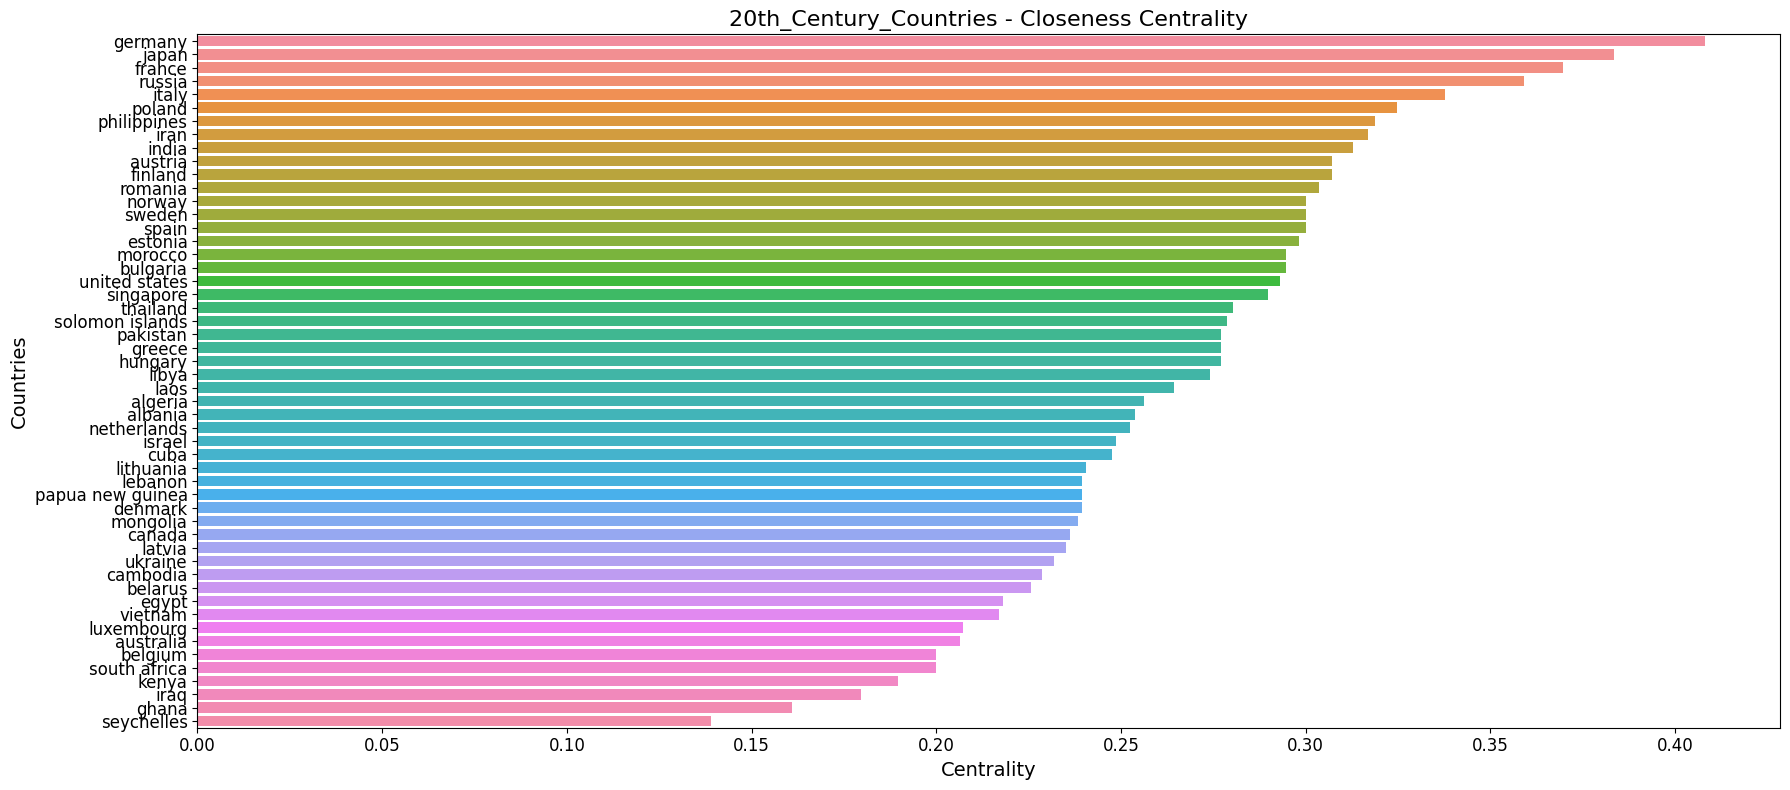

In [35]:
# Create a plot

plt.figure(figsize=(18, 8))  # Adjusted figure size for better readability
with sns.dark_palette("xkcd:blue", 22):
    plot = sns.barplot(
        x="centrality",
        y="countries",
        data=closeness_df,
        saturation=0.9
    )
    plot.set_title("20th_Century_Countries - Closeness Centrality", fontsize=16)
    plot.set_xlabel("Centrality", fontsize=14)
    plot.set_ylabel("Countries", fontsize=14)

    # Increase the font size of the tick labels
    plot.tick_params(labelsize=12)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

NOTES: 
Top Central Countries:
Germany, Japan, France, Russia, Italy, and Poland remain at the top, indicating that these countries are the most central in this 20th-century context. Their high closeness centrality values suggest that they are more connected or have shorter paths to other countries within this network.

Mid-Level Centrality:
Countries such as Finland, Norway, Sweden, the United States, Singapore, and Thailand have moderate centrality values. These nations maintain a notable level of connectivity, albeit slightly lower than the top tier.

Lower Centrality Countries:
Countries like Luxembourg, Australia, Belgium, Kenya, Iraq, Ghana, and Seychelles have lower closeness centrality scores, indicating they are more peripheral within this network. This means that they are less directly connected to the other countries, resulting in longer paths on average.

This bar chart suggests a hierarchy of influence or connectivity among 20th-century countries, with European and major Asian countries dominating the top central positions

In [36]:
# Save the plot as a file
plt.savefig("countries_closeness_centrality.png", dpi=300, bbox_inches='tight')  # Change file format if needed
plt.show()

<Figure size 640x480 with 0 Axes>

# Betweeness Centrality

In [37]:
# Betweenness Centrality

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(betweenness_dict.items(),columns=['countries','centrality'])

In [38]:
# Sort Graph data upon centrality column as ascending

betweenness_df.sort_values(by= ['centrality'], ascending= False, inplace = True)

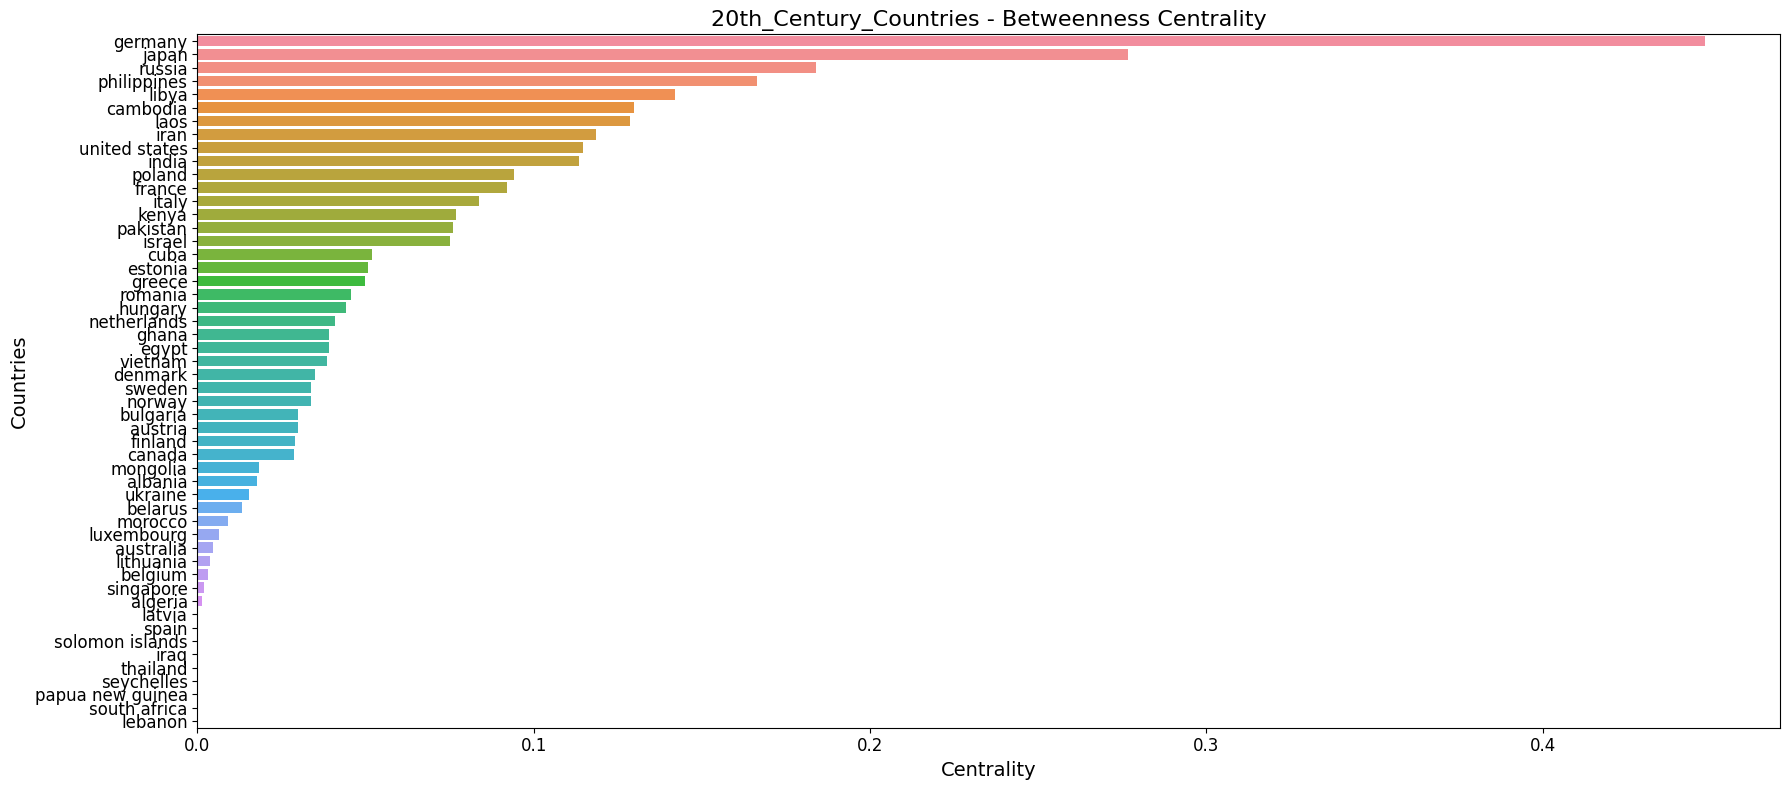

In [40]:
# Create a plot

plt.figure(figsize=(18, 8))  # Adjusted figure size for better readability
with sns.dark_palette("xkcd:blue", 22):
    plot = sns.barplot(
        x="centrality",
        y="countries",
        data=betweenness_df,
        saturation=0.9
    )
    plot.set_title("20th_Century_Countries - Betweenness Centrality", fontsize=16)
    plot.set_xlabel("Centrality", fontsize=14)
    plot.set_ylabel("Countries", fontsize=14)

    # Increase the font size of the tick labels
    plot.tick_params(labelsize=12)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

NOTES: This betweenness centrality plot highlights countries that were essential for connecting others within the network. Germany’s prominent position emphasizes its central role in 20th-century geopolitical affairs, acting as a bridge across multiple conflicts and alliances. The presence of countries like the Philippines, Libya, and Cambodia as relatively central nodes shows how strategic geopolitical positioning, even for smaller nations, can lead to significant roles as connectors in international networks. This analysis provides insight into the structure of historical alliances and the importance of certain countries in global diplomatic and military networks during the 20th century.

In [41]:
# Save the plot as a file
plt.savefig("countries_betweenness_centrality.png", dpi=300, bbox_inches='tight')  # Change file format if needed
plt.show()

<Figure size 640x480 with 0 Axes>